<a href="https://colab.research.google.com/github/semla/notebooks/blob/master/fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies & import
Install Keras and Tensorflow using pip.

In [5]:
!pip install -U keras tensorflow>=1.8.0 matplotlib numpy

yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.


Import statemets

In [0]:
from keras.preprocessing import image
from keras.models import Sequential # For sequential models, not functional
from keras.layers import Dense, Activation,MaxPooling2D, Dropout, Conv2D, Flatten # the layers used
from keras.datasets import fashion_mnist
from keras.utils import to_categorical # one-hot encoding

import numpy as np
import tensorflow as tf # tensorflow is the backend

Set variables to enable / disable features depending on where the code is run

In [7]:
use_matplotlib, use_google_drive, use_gpu = False, False, True #True, True, True 

if use_matplotlib:
  import matplotlib.pyplot as plt

# use gpu
if use_gpu:
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Using GPU at: {}'.format(device_name))

Using GPU at: /device:GPU:0


# Load data & do some preprocessing

In [8]:
# Load the dataset into training and test.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Normalization  & add a dimension for channel. Even if it is black & white images Keras wants a number for channels.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# the preprocess_input wants samples, x-values, y-values and channels
# since black & white only one channel, so add a 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# "One-hot-encode" the labels in train and test
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
# Further break training data into training and validation sets, 5000 in validation set and remaining 55,000 for training set)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Explore the data.
Take a look at the y_train which, is now one-hot-encoded.
Print the matrix of pixel values representing an image, then print the same data as an image.

Row number 2 of the labels: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Category 8 is Sneaker
The matrix of pixel values for sample 2:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.5 0.4 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.

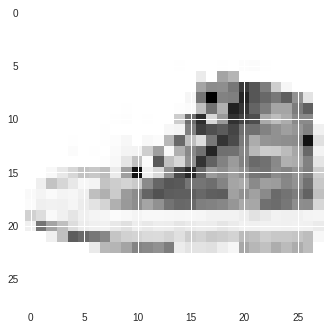

In [11]:
# Choose one of the 60000 training samples
img_index = 2
# y_train contains the lables, ranging from 0 to 9
print("Row number " + str(img_index) +" of the labels: " + str(y_train[img_index]))
label_index=np.argmax(y_train[img_index])
# Print the label, for example 2 Pullover
print ("Category "+str(label_index+1) + " is " +(fashion_mnist_labels[label_index]))

# Show one of the images from the training dataset
# reshaping neccessary to only show the columns with actual pixel data (not the one added with reshape above)
img=x_train[img_index].reshape(28,28)
np.set_printoptions(linewidth=125)
print("The matrix of pixel values for sample " + str(img_index) + ":\n" + str(np.around(img,1)))

# show the same data but as an image
if use_matplotlib:
  plt.imshow(img)

# The model
##Create the model and add layers

In [12]:
my_model = Sequential()

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu', input_shape=(28,28,1))) 
my_model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)))
my_model.add( Dropout(rate=0.3))

my_model.add( Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
my_model.add( MaxPooling2D(pool_size=2))
my_model.add( Dropout(0.3))

my_model.add( Flatten())
my_model.add( Dense(256, activation='relu'))
#my_model.add( Dropout(0.5))
my_model.add( Dense(10, activation='softmax'))

# print the number of layers
print('Number of layers: ' + str(len(my_model.layers)))

# print sumary of the model and its layers
my_model.summary()

Number of layers: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0

##Compile the model

In [0]:
my_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             #optimizer='SGD',
             #optimizer='RMSProp',
             metrics=['accuracy'])

## Training
Save training to history

In [14]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best.hdf5', verbose = 1, save_best_only=True)
bs = 64
ep = 10

history = my_model.fit(x_train,
         y_train,
         batch_size=bs,
         epochs=ep,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 15s 273us/step - loss: 0.4592 - acc: 0.8330 - val_loss: 0.3198 - val_acc: 0.8872

Epoch 00001: val_loss improved from inf to 0.31977, saving model to best.hdf5
Epoch 2/10
55000/55000 [==============================] - 12s 220us/step - loss: 0.3068 - acc: 0.8879 - val_loss: 0.2638 - val_acc: 0.9022

Epoch 00002: val_loss improved from 0.31977 to 0.26384, saving model to best.hdf5
Epoch 3/10
55000/55000 [==============================] - 12s 218us/step - loss: 0.2625 - acc: 0.9028 - val_loss: 0.2331 - val_acc: 0.9158

Epoch 00003: val_loss improved from 0.26384 to 0.23307, saving model to best.hdf5
Epoch 4/10
55000/55000 [==============================] - 12s 219us/step - loss: 0.2370 - acc: 0.9126 - val_loss: 0.2188 - val_acc: 0.9192

Epoch 00004: val_loss improved from 0.23307 to 0.21877, saving model to best.hdf5
Epoch 5/10
55000/55000 [==============================] - 12s 219us

## Plot feature map

mount google drive

In [15]:
if use_google_drive:
  from google.colab import drive
  drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Plot success

Function to save image to google drive

In [0]:
import datetime
def save_png(name,ep,bs):
  date = datetime.datetime.now()
  date = date.strftime("%y%m%d%H%M%S")
  print(date)
  filename = name + '-' + date
  if ep != 0:
    filename += '-'+str(ep)+'epochs-'+str(bs)+'batch-size.png'
  
  plt.savefig('/content/gdrive/My Drive/'+filename, bbox_inches='tight')  
  print('file probably saved to: ' + filename)
 # with open('/content/gdrive/My Drive/'+filename , 'w') as f:
 #   f.write('content')

190108105736
file probably saved to: acc-190108105736-10epochs-64batch-size.png


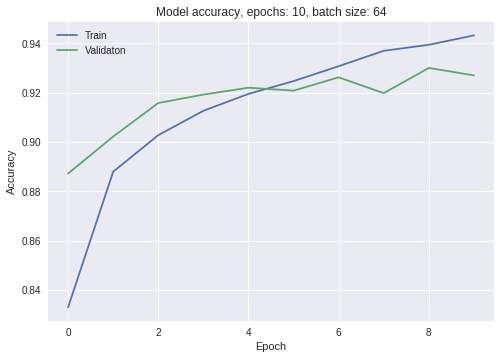

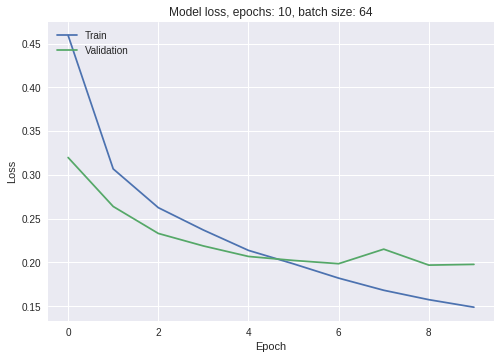

In [17]:
# print(type(history.history))
# print(len(history.history))
# print(len(history.history['loss']))
# print(history.history)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy, epochs: ' + str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.axis([0, len(history.history['loss']),0,1])
plt.legend(['Train', 'Validaton'], loc='upper left')
save_png('acc',ep,bs)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss, epochs: '+ str(ep) + ', batch size: ' + str(bs))
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.axis([0, len(history.history['loss']),0,1])
plt.axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Visualize a feature map / activation**

In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in my_model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=my_model.input, outputs=layer_outputs)

Dimensions in the first activation layer: 64
190108105737
file probably saved to: feature-map-190108105737


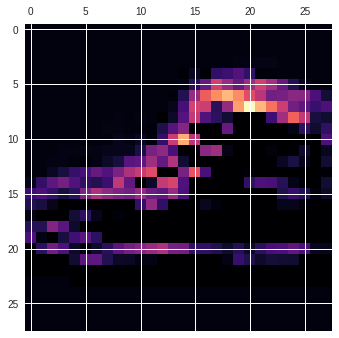

In [19]:
img_tensor = x_train[img_index]
# reshape from 3d to 4d
img_tensor = img_tensor.reshape(1,28,28,1)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print("Dimensions in the first activation layer: " + str(first_layer_activation.shape[3]))

if use_matplotlib:
  plt.matshow(first_layer_activation[0, :, :, 33], cmap='magma')
  save_png('feature-map',0,0)
  plt.show()

##Evaluate the model
//Try the model using only the pretrained downloaded weights
Evaluat the model

In [20]:
my_model.load_weights('best.hdf5')
predictions = my_model.predict(x_train)
print(len(predictions))
score = my_model.evaluate(x_test, y_test, verbose=1)
print(my_model.metrics_names)
print(score)
# Show test accuracy
print('Loss: ', score[0],', Accuracy:', score[1])

55000
10000/10000 [==============================] - 1s 104us/step
['loss', 'acc']
[0.22799445666074752, 0.9246]
Loss:  0.22799445666074752 , Accuracy: 0.9246
